<a href="https://colab.research.google.com/github/tdbartolo/tdbartolo-rep/blob/main/MVP_billionaries_statistics_tamara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

### Aluna: Tamara Di Bartolo


## 1. Definição do Problema

###**1.1.Qual é a descrição do problema?**

O problema consiste em classificar bilionários com base em uma variável chamada "selfMade", que indica se alcançaram sua fortuna por mérito próprio (TRUE) ou herdaram a riqueza (FALSE). O objetivo é criar um modelo de classificação que possa prever se um bilionário é "selfMade" com base em outras características disponíveis no conjunto de dados.

###**1.2.Este é um problema de aprendizado supervisionado ou não supervisionado?**

Este é um problema de aprendizado supervisionado, pois temos uma variável de saída ("selfMade") que é usada para treinar e avaliar o modelo. A tarefa consiste em classificar os bilionários em duas categorias: "selfMade" e "não selfMade".

###**1.3.Que premissas ou hipóteses você tem sobre o problema?**
**Premissa**: A variável "selfMade" é uma medida precisa da origem da riqueza dos bilionários. Acredita-se que essa variável fornece uma representação fiel de como os bilionários alcançaram sua fortuna. A confiabilidade dessa medida é essencial para o sucesso do modelo de classificação.

**Hipóteses:**

**i. Proporção de Origens de Riqueza:**

Hipótese: A proporção de bilionários que herdaram sua riqueza é maior do que a proporção de bilionários "selfmade".
Justificativa: Parte-se da premissa de que, globalmente, há uma tendência maior de herança de riqueza do que de conquista individual.

**ii. Indústria de Tecnologia:**

Hipótese: A indústria de Tecnologia é a mais comum entre os bilionários "selfMade".
Justificativa: A rápida ascensão de bilionários na indústria de Tecnologia sugere que essa área pode ser uma fonte proeminente de fortunas construídas por mérito próprio.

**iii. Relação entre Educação Superior e Origem da Riqueza:**

Hipótese: Em países com maior inscrição bruta no ensino superior, a origem da riqueza é mais frequentemente por méritos próprios.
Justificativa: Supõe-se que em ambientes com maior acesso à educação superior, a conquista individual seja mais prevalente na geração de riqueza.

**iv. Relação entre Produto Interno Bruto (PIB) e Herança de Riqueza:**

Hipótese: Em países com maior Produto Interno Bruto, a proporção de bilionários que herdou a riqueza é maior.
Justificativa: A ideia subjacente é que em economias mais robustas, as oportunidades de herança de riqueza podem ser mais amplas.

Essas hipóteses e premissas são fundamentais para a abordagem da análise exploratória dos dados e a seleção de variáveis relevantes para o modelo de classificação. Elas são guias importantes para entender as dinâmicas por trás da variável "selfMade" e para interpretar os resultados do modelo.



###**1.4.Que restrições ou condições foram impostas para selecionar os dados?**
 Os dados parecem ser centrados em bilionários do ranking mais alto, mas não é especificado qual é o critério para a inclusão ou exclusão de bilionários no conjunto de dados.
Não são fornecidas informações sobre a fonte dos dados, o que pode impactar a confiabilidade das informações.


###**1.5.Definição de atributos do conjunto de dados:**

Dataset disponível em https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data.
 Contém informações detalhadas sobre bilionários, incluindo características como fortuna, idade, país de origem, fonte de riqueza e a variável de saída "selfMade".

**rank:** Classificação do bilionário.

**finalWorth:** Fortuna final do bilionário em dólares.

**category:** Categoria à qual o bilionário pertence.

**personName:** Nome do bilionário.

**age:** Idade do bilionário.

**country:** País de origem do bilionário.

**city:** Cidade de origem do bilionário.

**source:** Fonte da riqueza do bilionário.

**industries:** Indústrias associadas ao bilionário.

**ctzship:** País de cidadania do bilionário.

**organization:** Organização associada ao bilionário.

**status:** Status do bilionário.

**gender:** Gênero do bilionário.

**birthDate:** Data de nascimento do bilionário.

**lastName:** Sobrenome do bilionário.

**firstName:** Nome do bilionário.

**title:** Título ou posição do bilionário.

**date:** Data da informação.

**state:** Estado de origem do bilionário.

**resStateRgn:** Região do estado de residência do bilionário.

**birthYear:** Ano de nascimento do bilionário.

**birthMonth:** Mês de nascimento do bilionário.

**birthDay:** Dia de nascimento do bilionário.

**cpiCtry:** Índice de Preços ao Consumidor do país.

**cpiChgCtry:** Mudança no Índice de Preços ao Consumidor do país.

**gdpCtry:** Produto Interno Bruto do país.

**tertiaryEnroll:** Inscrição bruta no ensino superior no país.

**primaryEnrollCtry:** Inscrição bruta no ensino primário no país.

**lifeExpectCtry:** Expectativa de vida no país.

**taxRevCtry:** Receita fiscal do país.

**totalTaxRate:** Taxa total de imposto no país.

**populationCtry:** População do país.

**latitudeCtry:** Latitude do país.

**longitudeCtry:** Longitude do país.

**selfMade:** Variável de saída indicando se o bilionário é "selfMade" (TRUE) ou não (FALSE).

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Nesta seção, realiza-se a carga de um conjunto de dados sobre bilionários a partir de uma URL específica usando a biblioteca Pandas. O conjunto de dados é inicialmente definido com colunas específicas. Após a leitura do arquivo CSV, as colunas são renomeadas para terem no máximo 10 caracteres. Além disso, a coluna 'selfMade' é movida para o final do conjunto de dados, organizando-o de acordo com os requisitos específicos. A função dataset.head() é usada para exibir as primeiras linhas do DataFrame permitindo uma visão rápida dos dados. O resultado é um DataFrame pronto para análises subsequentes, adaptado conforme as necessidades do projeto.

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/tdbartolo/tdbartolo-rep/main/mvp-analise-de-dados-e-boas-praticas/Billionaires%20Statistics%20Dataset.csv"

# Informa o cabeçalho das colunas
colunas = ['rank', 'finalWorth',	'category', 'personName',	'age',	'country',	'city',	'source',	'industries',	'countryOfCitizenship',	'organization',	'selfMade',	'status', 'gender',	'birthDate',	'lastName',	'firstName',	'title',	'date',	'state',	'residenceStateRegion',	'birthYear',	'birthMonth',	'birthDay',	'cpi_country',	'cpi_change_country',	'gdp_country',	'gross_tertiary_education_enrollment',	'gross_primary_education_enrollment_country',	'life_expectancy_country',	'tax_revenue_country_country',	'total_tax_rate_country',	'population_country',	'latitude_country',	'longitude_country']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Renomeia as colunas para até 10 caracteres
dataset.columns = ['rank', 'finalWorth', 'category', 'personName', 'age', 'country', 'city', 'source', 'industries',
                   'ctzship', 'organization', 'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
                   'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'cpiCtry',
                   'cpiChgCtry', 'gdpCtry', 'tertiaryEnroll', 'primaryEnrollCtry', 'lifeExpectCtry', 'taxRevCtry',
                   'totalTaxRate', 'populationCtry', 'latitudeCtry', 'longitudeCtry']

# Mover a coluna 'selfMade' para o final
dataset = dataset[[col for col in dataset.columns if col != 'selfMade'] + ['selfMade']]


In [ ]:
pd.set_option('display.max_columns', None)
dataset.head()

rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

         ctzship                      organization status gender  \
0         France  LVMH Moët Hennessy Louis Vuitton      U      M   
1  United States                             Tesla      D      M   
2  United States                            Amazon      D      M   
3  United States                            Oracle      U      M   
4  United States    Berkshire Hathaway Inc. (Cl A)      D      M   

        birthDate lastName firstName                 title           date  \
0   3/5/1949 0:00  Arnault   Bernard      Chairman and CEO  4/4/2023 5:01   
1  6/28/1971 0:00     Musk      Elon                   CEO  4/4/2023 5:01   
2  1/12/1964 0:00    Bezos      Jeff  Chairman and Founder  4/4/2023 5:01   
3  8/17/1944 0:00  Ellison     Larry       CTO and Founder  4/4/2023 5:01   
4  8/30/1930 0:00  Buffett    Warren                   CEO  4/4/2023 5:01   

        state resStateRgn  birthYear  birthMonth  birthDay  cpiCtry  \
0         NaN         NaN     1949.0         3.0       5.0   110.05   
1       Texas       South     1971.0         6.0      28.0   117.24   
2  Washington        West     1964.0         1.0      12.0   117.24   
3      Hawaii        West     1944.0         8.0      17.0   117.24   
4    Nebraska     Midwest     1930.0         8.0      30.0   117.24   

   cpiChgCtry               gdpCtry  tertiaryEnroll  primaryEnrollCtry  \
0         1.1   $2,715,518,274,227             65.6              102.5   
1         7.5  $21,427,700,000,000             88.2              101.8   
2         7.5  $21,427,700,000,000             88.2              101.8   
3         7.5  $21,427,700,000,000             88.2              101.8   
4         7.5  $21,427,700,000,000             88.2              101.8   

   lifeExpectCtry  taxRevCtry  totalTaxRate  populationCtry  latitudeCtry  \
0            82.5        24.2          60.7      67059887.0     46.227638   
1            78.5         9.6          36.6     328239523.0     37.090240   
2            78.5         9.6          36.6     328239523.0     37.090240   
3            78.5         9.6          36.6     328239523.0     37.090240   
4            78.5         9.6          36.6     328239523.0     37.090240   

   longitudeCtry  selfMade  
0       2.213749     False  
1     -95.712891      True  
2     -95.712891      True  
3     -95.712891      True  
4     -95.712891      True

In [ ]:
#Apresenta uma visão com a quantidade de valores distintos para cada atributo.
dataset.nunique()

rank                  219
finalWorth            219
category               18
personName           2638
age                    79
country                78
city                  741
source                906
industries             18
ctzship                77
organization          294
status                  6
gender                  2
birthDate            2060
lastName             1736
firstName            1770
title                  97
date                    2
state                  45
resStateRgn             5
birthYear              77
birthMonth             12
birthDay               31
cpiCtry                63
cpiChgCtry             44
gdpCtry                68
tertiaryEnroll         63
primaryEnrollCtry      60
lifeExpectCtry         54
taxRevCtry             57
totalTaxRate           63
populationCtry         68
latitudeCtry           68
longitudeCtry          68
selfMade                2
dtype: int64


A exclusão de certos atributos foi realizada com o intuito de otimizar a eficiência computacional e reduzir a complexidade do conjunto de dados. Os atributos 'category', 'personName', 'country', 'city', 'source', 'ctzship', 'organization', 'status', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'latitudeCtry' e 'longitudeCtry' foram removidos imediatamente após o carregamento, sem a aplicação do LabelEncoder.

Esta decisão foi baseada na busca por simplificação do conjunto de dados, tornando-o mais compreensível e eficiente no processamento. A exclusão desses atributos é justificada pela presença de informações redundantes ou únicas para cada bilionário, como os nomes ('personName', 'lastName', 'firstName') e cidades de origem. Esses atributos não contribuem significativamente para o modelo de aprendizado de máquina e podem até mesmo prejudicar o desempenho, induzindo ao overfitting.

Além disso, a exclusão de variáveis únicas evita um aumento desnecessário na dimensionalidade dos dados. Foi observado que manter certas variáveis únicas não agrega valor ao modelo e pode complicar a análise.

A escolha de manter o atributo 'age' e excluir os atributos 'birthDate', 'birthYear', 'birthMonth' e 'birthDay' foi motivada pela redundância de informações contidas nesses últimos em relação à idade. A decisão de manter 'gdpcountry' e excluir 'country', 'city', 'latitudeCtry' e 'longitudeCtry' foi tomada com base na relevância do Produto Interno Bruto (GDP) do país em comparação com as informações específicas de localização e país.
Além disso, a exclusão dos atributos 'category' foi realizada visando eliminar informações redundantes e simplificar a representação do conjunto de dados. A categoria à qual o bilionário pertence ('category') foi removida em favor da manutenção do atributo 'industries', que oferece informações mais específicas e relevantes sobre as áreas de atuação dos bilionários. Essa abordagem visa preservar informações essenciais enquanto simplifica o conjunto de dados.

In [ ]:
# Exclui as variáveis 'lastName', 'firstName', 'personName', 'city'
dataset = dataset.drop(['category', 'personName', 'country', 'city', 'source', 'ctzship', 'organization', 'status', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'latitudeCtry', 'longitudeCtry'], axis=1)

dataset.head()

rank  finalWorth   age             industries gender  cpiCtry  cpiChgCtry  \
0     1      211000  74.0       Fashion & Retail      M   110.05         1.1   
1     2      180000  51.0             Automotive      M   117.24         7.5   
2     3      114000  59.0             Technology      M   117.24         7.5   
3     4      107000  78.0             Technology      M   117.24         7.5   
4     5      106000  92.0  Finance & Investments      M   117.24         7.5   

                gdpCtry  tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  \
0   $2,715,518,274,227             65.6              102.5            82.5   
1  $21,427,700,000,000             88.2              101.8            78.5   
2  $21,427,700,000,000             88.2              101.8            78.5   
3  $21,427,700,000,000             88.2              101.8            78.5   
4  $21,427,700,000,000             88.2              101.8            78.5   

   taxRevCtry  totalTaxRate  populationCtry  selfMade  
0        24.2          60.7      67059887.0     False  
1         9.6          36.6     328239523.0      True  
2         9.6          36.6     328239523.0      True  
3         9.6          36.6     328239523.0      True  
4         9.6          36.6     328239523.0      True


O código realiza a codificação de duas variáveis categóricas ('gender' e 'selfMade') em valores numéricos binários em um DataFrame chamado dataset. Para 'gender', valores 'F' são codificados como 0 e 'M' como 1. Para 'selfMade', valores False são codificados como 0 e True como 1. Essa transformação é útil para permitir o processamento de informações categóricas por algoritmos de aprendizado de máquina que esperam entradas numéricas.

In [ ]:
# Transforma a variável 'gender' em 0 e 1
gender_mapping = {'F': 0, 'M': 1}
dataset['gender'] = dataset['gender'].map(gender_mapping)

# Transforma a variável 'selfMade' em 0 e 1
selfmade_mapping = {False: 0, True: 1}
dataset['selfMade'] = dataset['selfMade'].map(selfmade_mapping)

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
print(dataset.shape)

(2640, 15)


In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               2640 non-null   int64  
 1   finalWorth         2640 non-null   int64  
 2   age                2575 non-null   float64
 3   industries         2640 non-null   object 
 4   gender             2640 non-null   int64  
 5   cpiCtry            2456 non-null   float64
 6   cpiChgCtry         2456 non-null   float64
 7   gdpCtry            2476 non-null   object 
 8   tertiaryEnroll     2458 non-null   float64
 9   primaryEnrollCtry  2459 non-null   float64
 10  lifeExpectCtry     2458 non-null   float64
 11  taxRevCtry         2457 non-null   float64
 12  totalTaxRate       2458 non-null   float64
 13  populationCtry     2476 non-null   float64
 14  selfMade           2640 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 309.5+ KB
None


In [ ]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

rank  finalWorth   age             industries  gender  cpiCtry  cpiChgCtry  \
0     1      211000  74.0       Fashion & Retail       1   110.05         1.1   
1     2      180000  51.0             Automotive       1   117.24         7.5   
2     3      114000  59.0             Technology       1   117.24         7.5   
3     4      107000  78.0             Technology       1   117.24         7.5   
4     5      106000  92.0  Finance & Investments       1   117.24         7.5   
5     6      104000  67.0             Technology       1   117.24         7.5   
6     7       94500  81.0  Media & Entertainment       1   117.24         7.5   
7     8       93000  83.0                Telecom       1   141.54         3.6   
8     9       83400  65.0            Diversified       1   180.44         7.7   
9    10       80700  67.0             Technology       1   117.24         7.5   

                gdpCtry  tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  \
0   $2,715,518,274,227             65.6              102.5            82.5   
1  $21,427,700,000,000             88.2              101.8            78.5   
2  $21,427,700,000,000             88.2              101.8            78.5   
3  $21,427,700,000,000             88.2              101.8            78.5   
4  $21,427,700,000,000             88.2              101.8            78.5   
5  $21,427,700,000,000             88.2              101.8            78.5   
6  $21,427,700,000,000             88.2              101.8            78.5   
7   $1,258,286,717,125             40.2              105.8            75.0   
8   $2,611,000,000,000             28.1              113.0            69.4   
9  $21,427,700,000,000             88.2              101.8            78.5   

   taxRevCtry  totalTaxRate  populationCtry  selfMade  
0        24.2          60.7    6.705989e+07         0  
1         9.6          36.6    3.282395e+08         1  
2         9.6          36.6    3.282395e+08         1  
3         9.6          36.6    3.282395e+08         1  
4         9.6          36.6    3.282395e+08         1  
5         9.6          36.6    3.282395e+08         1  
6         9.6          36.6    3.282395e+08         1  
7        13.1          55.1    1.260140e+08         1  
8        11.2          49.7    1.366418e+09         0  
9         9.6          36.6    3.282395e+08         1

In [ ]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

rank  finalWorth   age        industries  gender  cpiCtry  cpiChgCtry  \
2630  2540        1000  35.0     Manufacturing       0      NaN         NaN   
2631  2540        1000  54.0  Fashion & Retail       1   125.08         2.9   
2632  2540        1000  59.0     Manufacturing       1   125.08         2.9   
2633  2540        1000  53.0     Manufacturing       1   125.08         2.9   
2634  2540        1000  63.0        Healthcare       1   125.08         2.9   
2635  2540        1000  51.0        Healthcare       1   125.08         2.9   
2636  2540        1000  80.0   Food & Beverage       1   117.24         7.5   
2637  2540        1000  60.0     Manufacturing       1   125.08         2.9   
2638  2540        1000  71.0       Real Estate       1   125.08         2.9   
2639  2540        1000  66.0       Diversified       1   129.61         2.5   

                   gdpCtry  tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  \
2630                   NaN             NaN                NaN             NaN   
2631  $19,910,000,000,000             50.6              100.2            77.0   
2632  $19,910,000,000,000             50.6              100.2            77.0   
2633  $19,910,000,000,000             50.6              100.2            77.0   
2634  $19,910,000,000,000             50.6              100.2            77.0   
2635  $19,910,000,000,000             50.6              100.2            77.0   
2636  $21,427,700,000,000             88.2              101.8            78.5   
2637  $19,910,000,000,000             50.6              100.2            77.0   
2638  $19,910,000,000,000             50.6              100.2            77.0   
2639     $376,795,508,680             35.5              107.5            71.1   

      taxRevCtry  totalTaxRate  populationCtry  selfMade  
2630         NaN           NaN             NaN         0  
2631         9.4          59.2    1.397715e+09         1  
2632         9.4          59.2    1.397715e+09         1  
2633         9.4          59.2    1.397715e+09         1  
2634         9.4          59.2    1.397715e+09         1  
2635         9.4          59.2    1.397715e+09         1  
2636         9.6          36.6    3.282395e+08         0  
2637         9.4          59.2    1.397715e+09         1  
2638         9.4          59.2    1.397715e+09         1  
2639        14.0          43.1    1.081166e+08         0

O dataset.dtypes é utilizado para verificar os tipos de dados de cada atributo no DataFrame, fornecendo informações sobre se são inteiros, ponto flutuante, objetos (geralmente indicando texto), entre outros, pois pode ser necessário realizar conversões. O dataset.describe() gera um resumo estatístico para atributos numéricos. Apresenta estatísticas como média, desvio padrão, mínimo, máximo e quartis. Esse resumo oferece uma visão estatística abrangente dos dados, facilitando a compreensão da distribuição e variabilidade dos valores em cada atributo.

In [ ]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

rank                   int64
finalWorth             int64
age                  float64
industries            object
gender                 int64
cpiCtry              float64
cpiChgCtry           float64
gdpCtry               object
tertiaryEnroll       float64
primaryEnrollCtry    float64
lifeExpectCtry       float64
taxRevCtry           float64
totalTaxRate         float64
populationCtry       float64
selfMade               int64
dtype: object

O atributo **gdpCtry** representa valores monetários e utiliza o símbolo "$", que foi removido antes de converter os valores para números.
Na sequência mostramos o resumo estatístico

In [ ]:
# Remove o símbolo '$' e converte para tipo numérico
dataset['gdpCtry'] = pd.to_numeric(dataset['gdpCtry'].replace('[\$,]', '', regex=True), errors='coerce')

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

rank     finalWorth          age       gender      cpiCtry  \
count  2640.000000    2640.000000  2575.000000  2640.000000  2456.000000   
mean   1289.159091    4623.787879    65.140194     0.872348   127.755204   
std     739.693726    9834.240939    13.258098     0.333765    26.452951   
min       1.000000    1000.000000    18.000000     0.000000    99.550000   
25%     659.000000    1500.000000    56.000000     1.000000   117.240000   
50%    1312.000000    2300.000000    65.000000     1.000000   117.240000   
75%    1905.000000    4200.000000    75.000000     1.000000   125.080000   
max    2540.000000  211000.000000   101.000000     1.000000   288.570000   

        cpiChgCtry       gdpCtry  tertiaryEnroll  primaryEnrollCtry  \
count  2456.000000  2.476000e+03     2458.000000        2459.000000   
mean      4.364169  1.158287e+13       67.225671         102.858520   
std       3.623763  9.575588e+12       21.343426           4.710977   
min      -1.900000  3.154058e+09        4.000000          84.700000   
25%       1.700000  1.736426e+12       50.600000         100.200000   
50%       2.900000  1.991000e+13       65.600000         101.800000   
75%       7.500000  2.142770e+13       88.200000         102.600000   
max      53.500000  2.142770e+13      136.600000         142.100000   

       lifeExpectCtry   taxRevCtry  totalTaxRate  populationCtry     selfMade  
count     2458.000000  2457.000000   2458.000000    2.476000e+03  2640.000000  
mean        78.122823    12.546235     43.963344    5.102053e+08     0.686364  
std          3.730099     5.368625     12.145296    5.542447e+08     0.464058  
min         54.300000     0.100000      9.900000    3.801900e+04     0.000000  
25%         77.000000     9.600000     36.600000    6.683440e+07     0.000000  
50%         78.500000     9.600000     41.200000    3.282395e+08     1.000000  
75%         80.900000    12.800000     59.100000    1.366418e+09     1.000000  
max         84.200000    37.200000    106.300000    1.397715e+09     1.000000

Avaliou-se o conjunto de dados possui um equilíbrio entre as classes, a fim de lidar com qualquer desequilíbrio posteriormente, se necessário. Observaremos se as classes 0 (não selfMade) e 1 (selfMade) apresentam um desequilíbrio. Esta informação será armazenada, pois provavelmente será necessário realizar algum tipo de tratamento nas etapas seguintes.

In [ ]:
# distribuição das classes
print(dataset.groupby('selfMade').size())

selfMade
0     828
1    1812
dtype: int64


### 3.2. Visualizações Unimodais

Nesta seção construiu-se um conjunto de histogramas para visualizar a distribuição de cada atributo no conjunto de dados. A função hist é utilizada para criar os histogramas, e figsize=(15,10) define as dimensões da figura para uma melhor visualização. A última linha, plt.show(), exibe os histogramas gerados. Cada histograma representa a frequência ou contagem dos valores em um determinado atributo, proporcionando uma visão geral das distribuições dos dados.


A avaliação do resumo estatístico do conjunto de dados e dos histogramas permitiu as observações sobre as distribuições dos atributos selecionados:

A classificação dos bilionários representada no atributo **rank** não revela claramente uma distribuição específica, pois é um índice ordinal.

A fortuna final dos bilionários representada no atributo **finalWorth** possui uma distribuição fortemente assimétrica, com uma média (mean) significativamente menor que o valor máximo, indicando a presença de valores discrepantes (outliers).

A idade dos bilionários representada no atributo **age** parece seguir uma distribuição razoavelmente simétrica, com a maioria deles concentrados entre 56 e 75 anos.

A distribuição do atributo **gender** indica que a maioria dos bilionários é do gênero masculino (1), pois a média (mean) está próxima de 1.

**cpiCtry, cpiChgCtry, tertiaryEnroll, primaryEnrollCtry, lifeExpectCtry, taxRevCtry, totalTaxRate, populationCtry**: Esses atributos aparentam ter diferentes escalas e distribuições, sugerindo que podem precisar de normalização ou transformações para serem mais comparáveis.

A variável de saída **selfMade** indica se um bilionário é "selfMade" (1) ou não (0). A distribuição mostra um desequilíbrio, com a maioria sendo "selfMade" (1), como indicado pela média (mean) e pela mediana (50%).

Essas observações fornecem insights iniciais sobre a natureza dos atributos e podem orientar decisões subsequentes no pré-processamento dos dados.


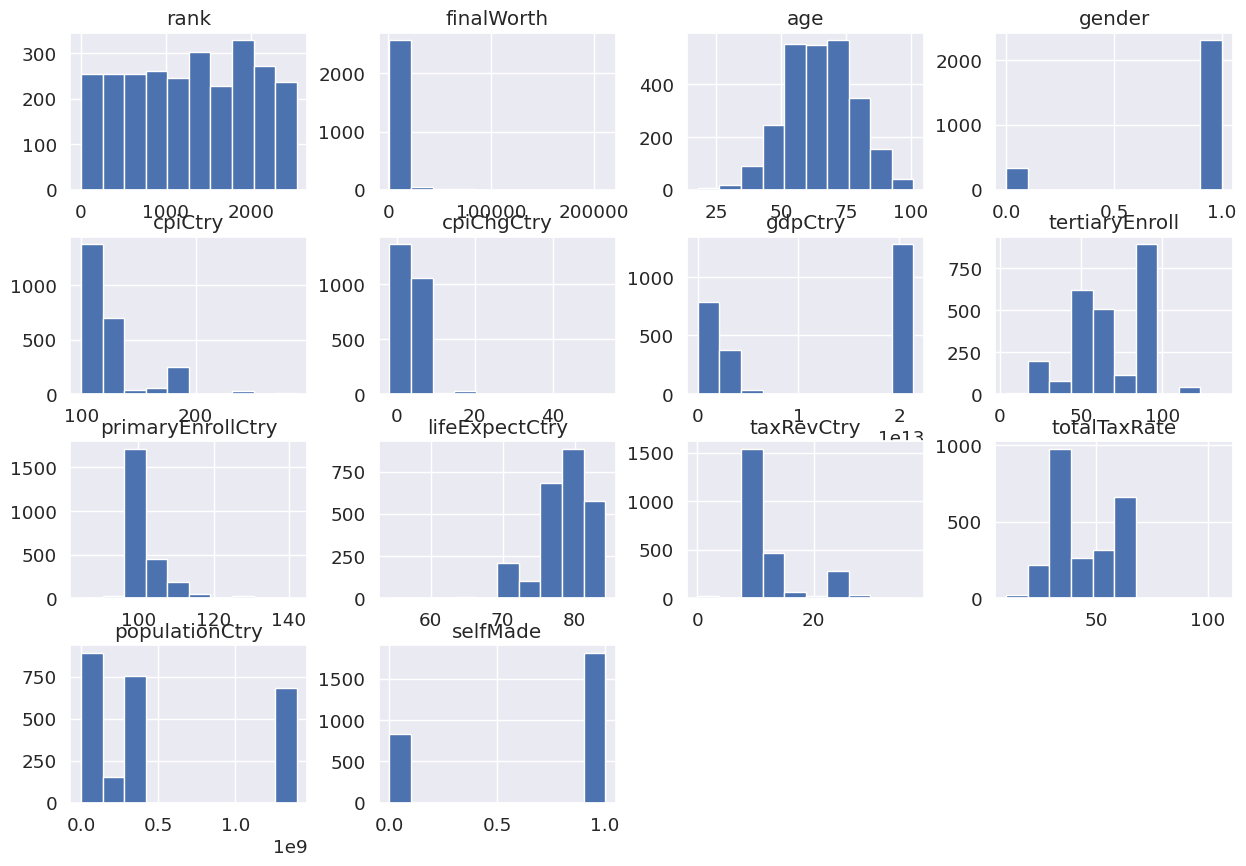

In [ ]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()


O Density Plot, ou Gráfico de Densidade, guarda semelhanças com o histograma, embora apresente uma visualização ligeiramente diferente. Este tipo de gráfico facilita a identificação da distribuição dos atributos no conjunto de dados. Assim como fizemos com o histograma, iremos gerar um density plot para cada atributo do dataset.

Ao analisar esses density plots, observamos que muitos dos atributos exibem uma distribuição assimétrica. Em casos como esse, uma transformação, como a Box-Cox, que tem o potencial de aproximar a distribuição de uma normal, pode ser uma abordagem útil.

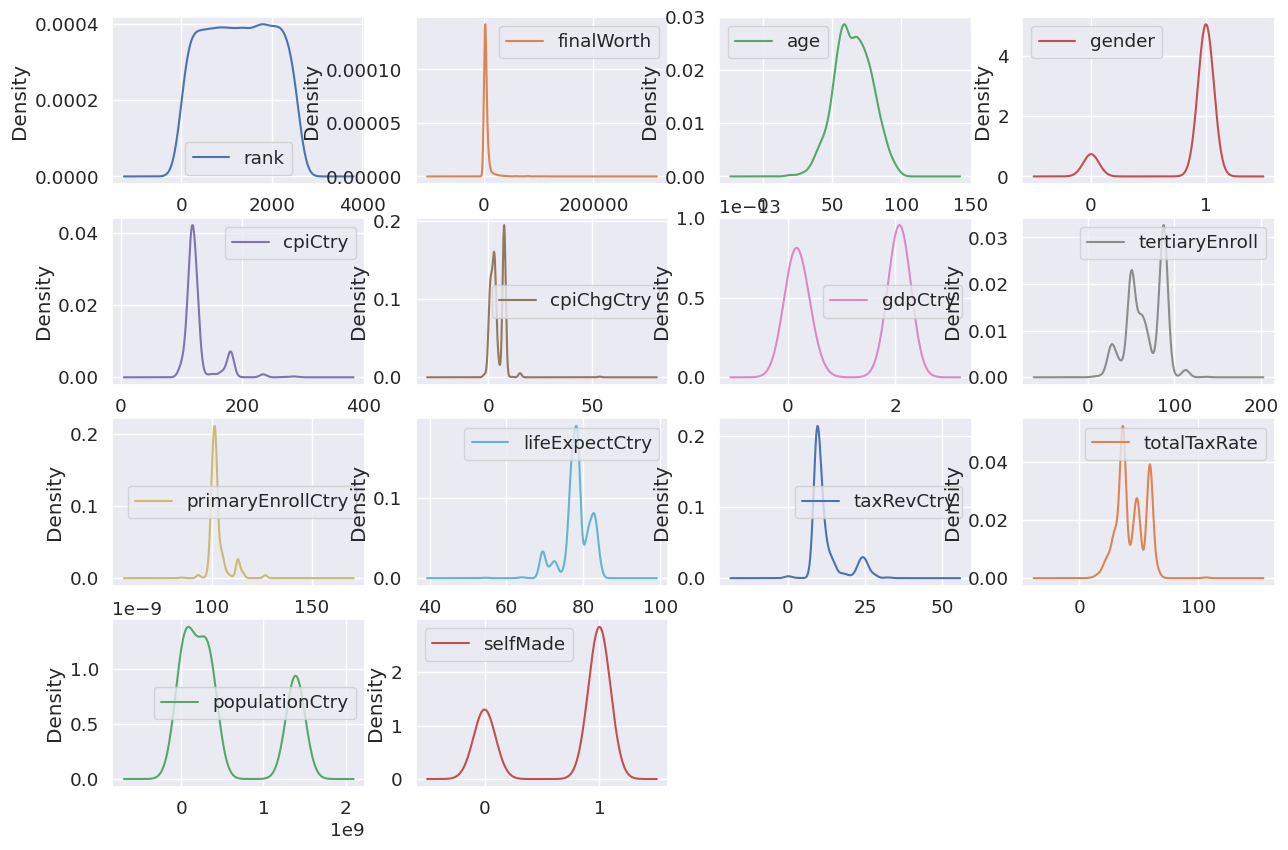

In [ ]:
# Density Plot
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,10))
plt.show()

Vamos agora explorar boxplots. No boxplot, a linha central (representada em verde) corresponde à mediana (ou segundo quartil, p50). A linha inferior indica o primeiro quartil (p25), enquanto a linha superior representa o terceiro quartil (p75). A representação gráfica do boxplot oferece insights sobre a dispersão dos dados e a identificação de possíveis valores atípicos.

Observação: Valores muito distantes da média (superiores a 3 desvios padrão) podem ser considerados outliers.

Ao analisar os boxplots, é perceptível que a variabilidade nos atributos do conjunto de dados é significativamente distinta. Essa representação visual nos permite compreender a dispersão dos dados e identificar eventuais pontos discrepantes.

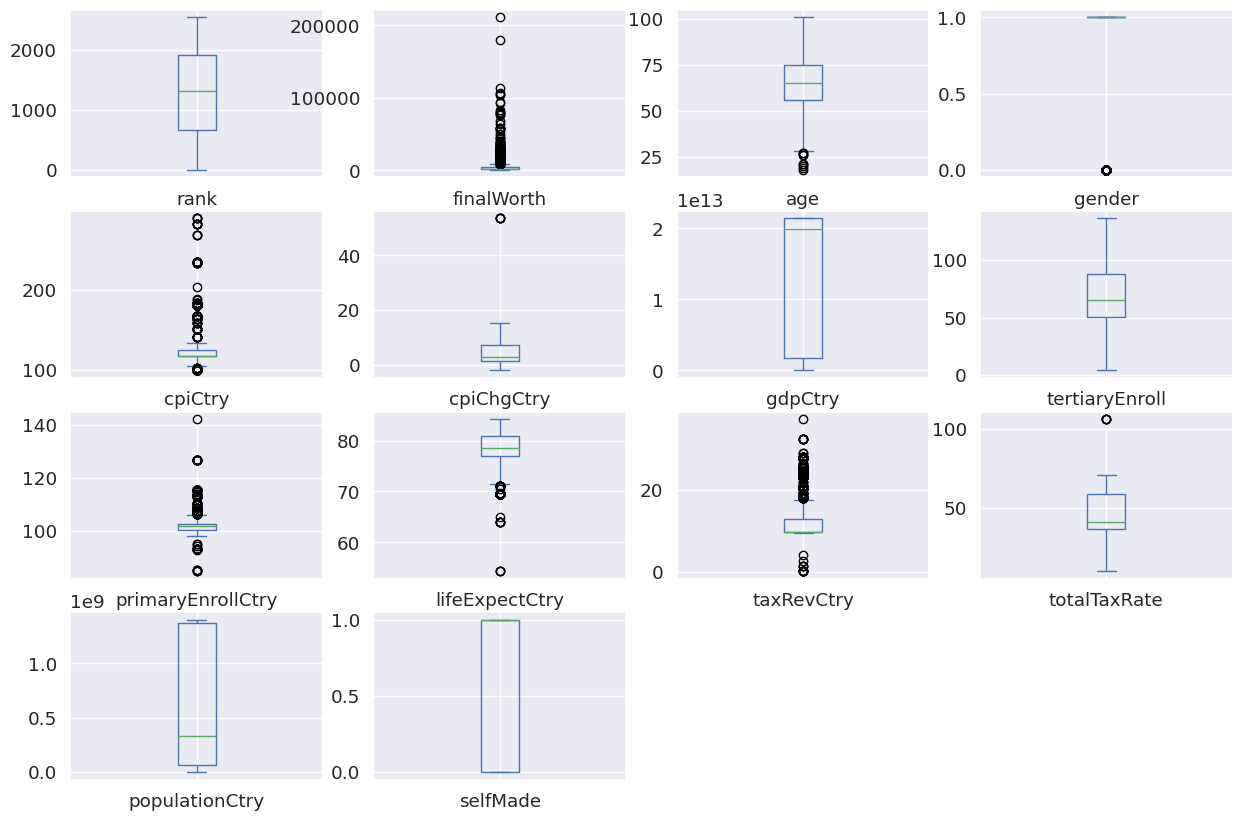

In [ ]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais


Ao analisar as correlações entre os atributos por meio da matriz de correlação, identificamos uma estrutura na ordem desses atributos. A presença de tons azuis ao redor da diagonal sugere que atributos próximos uns aos outros geralmente apresentam uma correlação mais forte. Além disso, tonalidades avermelhadas indicam uma possível correlação negativa moderada conforme os atributos se afastam um do outro na ordem.

A próxima etapa envolve a verificação da covariância entre as variáveis numéricas do dataset. A covariância reflete como duas variáveis numéricas estão relacionadas, sendo possível utilizar métricas como o coeficiente de correlação de Pearson para interpretar essas relações. Valores próximos de -1 indicam uma correlação negativa, valores próximos de +1 indicam correlação positiva, e valores próximos de 0 indicam ausência de correlação entre as variáveis.

É relevante observar que essa informação é crucial, especialmente para algoritmos como regressão linear e regressão logística, que podem enfrentar desafios de desempenho quando lidam com atributos altamente correlacionados. Nestes casos devem ser feitos os tratamentos necessários.
A análise da matriz de correlação revela as seguintes tendências e relações entre as variáveis:

**Correlações Positivas Fortes:** **finalWorth e taxRevCtry:** A fortuna final do bilionário está fortemente correlacionada de forma positiva com a receita fiscal do país.
**Correlações Positivas Moderadas:** **finalWorth e gdpCtry:** A fortuna final do bilionário apresenta uma correlação positiva moderada com o Produto Interno Bruto (PIB) do país.
**taxRevCtry e totalTaxRate:** A receita fiscal do país possui uma correlação positiva moderada com a taxa total de impostos.

**Correlações Negativas Moderadas:** **age e lifeExpectCtry:** A idade do bilionário tem uma correlação negativa moderada com a expectativa de vida no país.

**Correlações Próximas a Zero:** Algumas variáveis, como **rank, tertiaryEnroll, primaryEnrollCtry, cpiCtry, cpiChgCtry, gross_tertiary_education_enrollment, gross_primary_education_enrollment_country, populationCtry, latitudeCtry, longitudeCtry**, apresentam correlações próximas a zero com outras variáveis.

**Correlação com a Variável de Saída (selfMade):** Não há correlação específica evidente na matriz para a variável de saída selfMade em relação às outras variáveis. Isso sugere que as características do bilionário não apresentam correlações lineares fortes com a autossuficiência financeira.
É importante destacar que correlação não implica causalidade, e uma compreensão mais profunda das relações entre as variáveis pode depender de outras técnicas estatísticas e de machine learning.

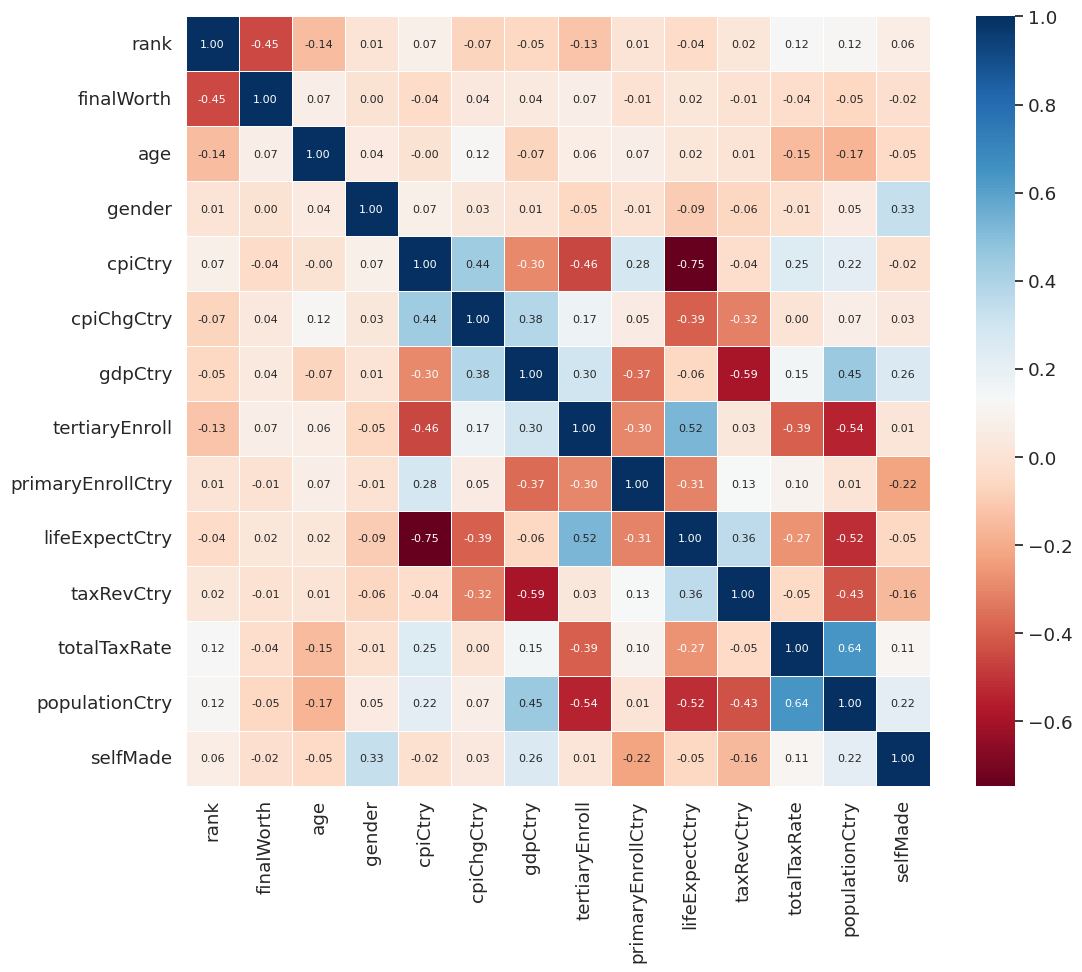

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.show()

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

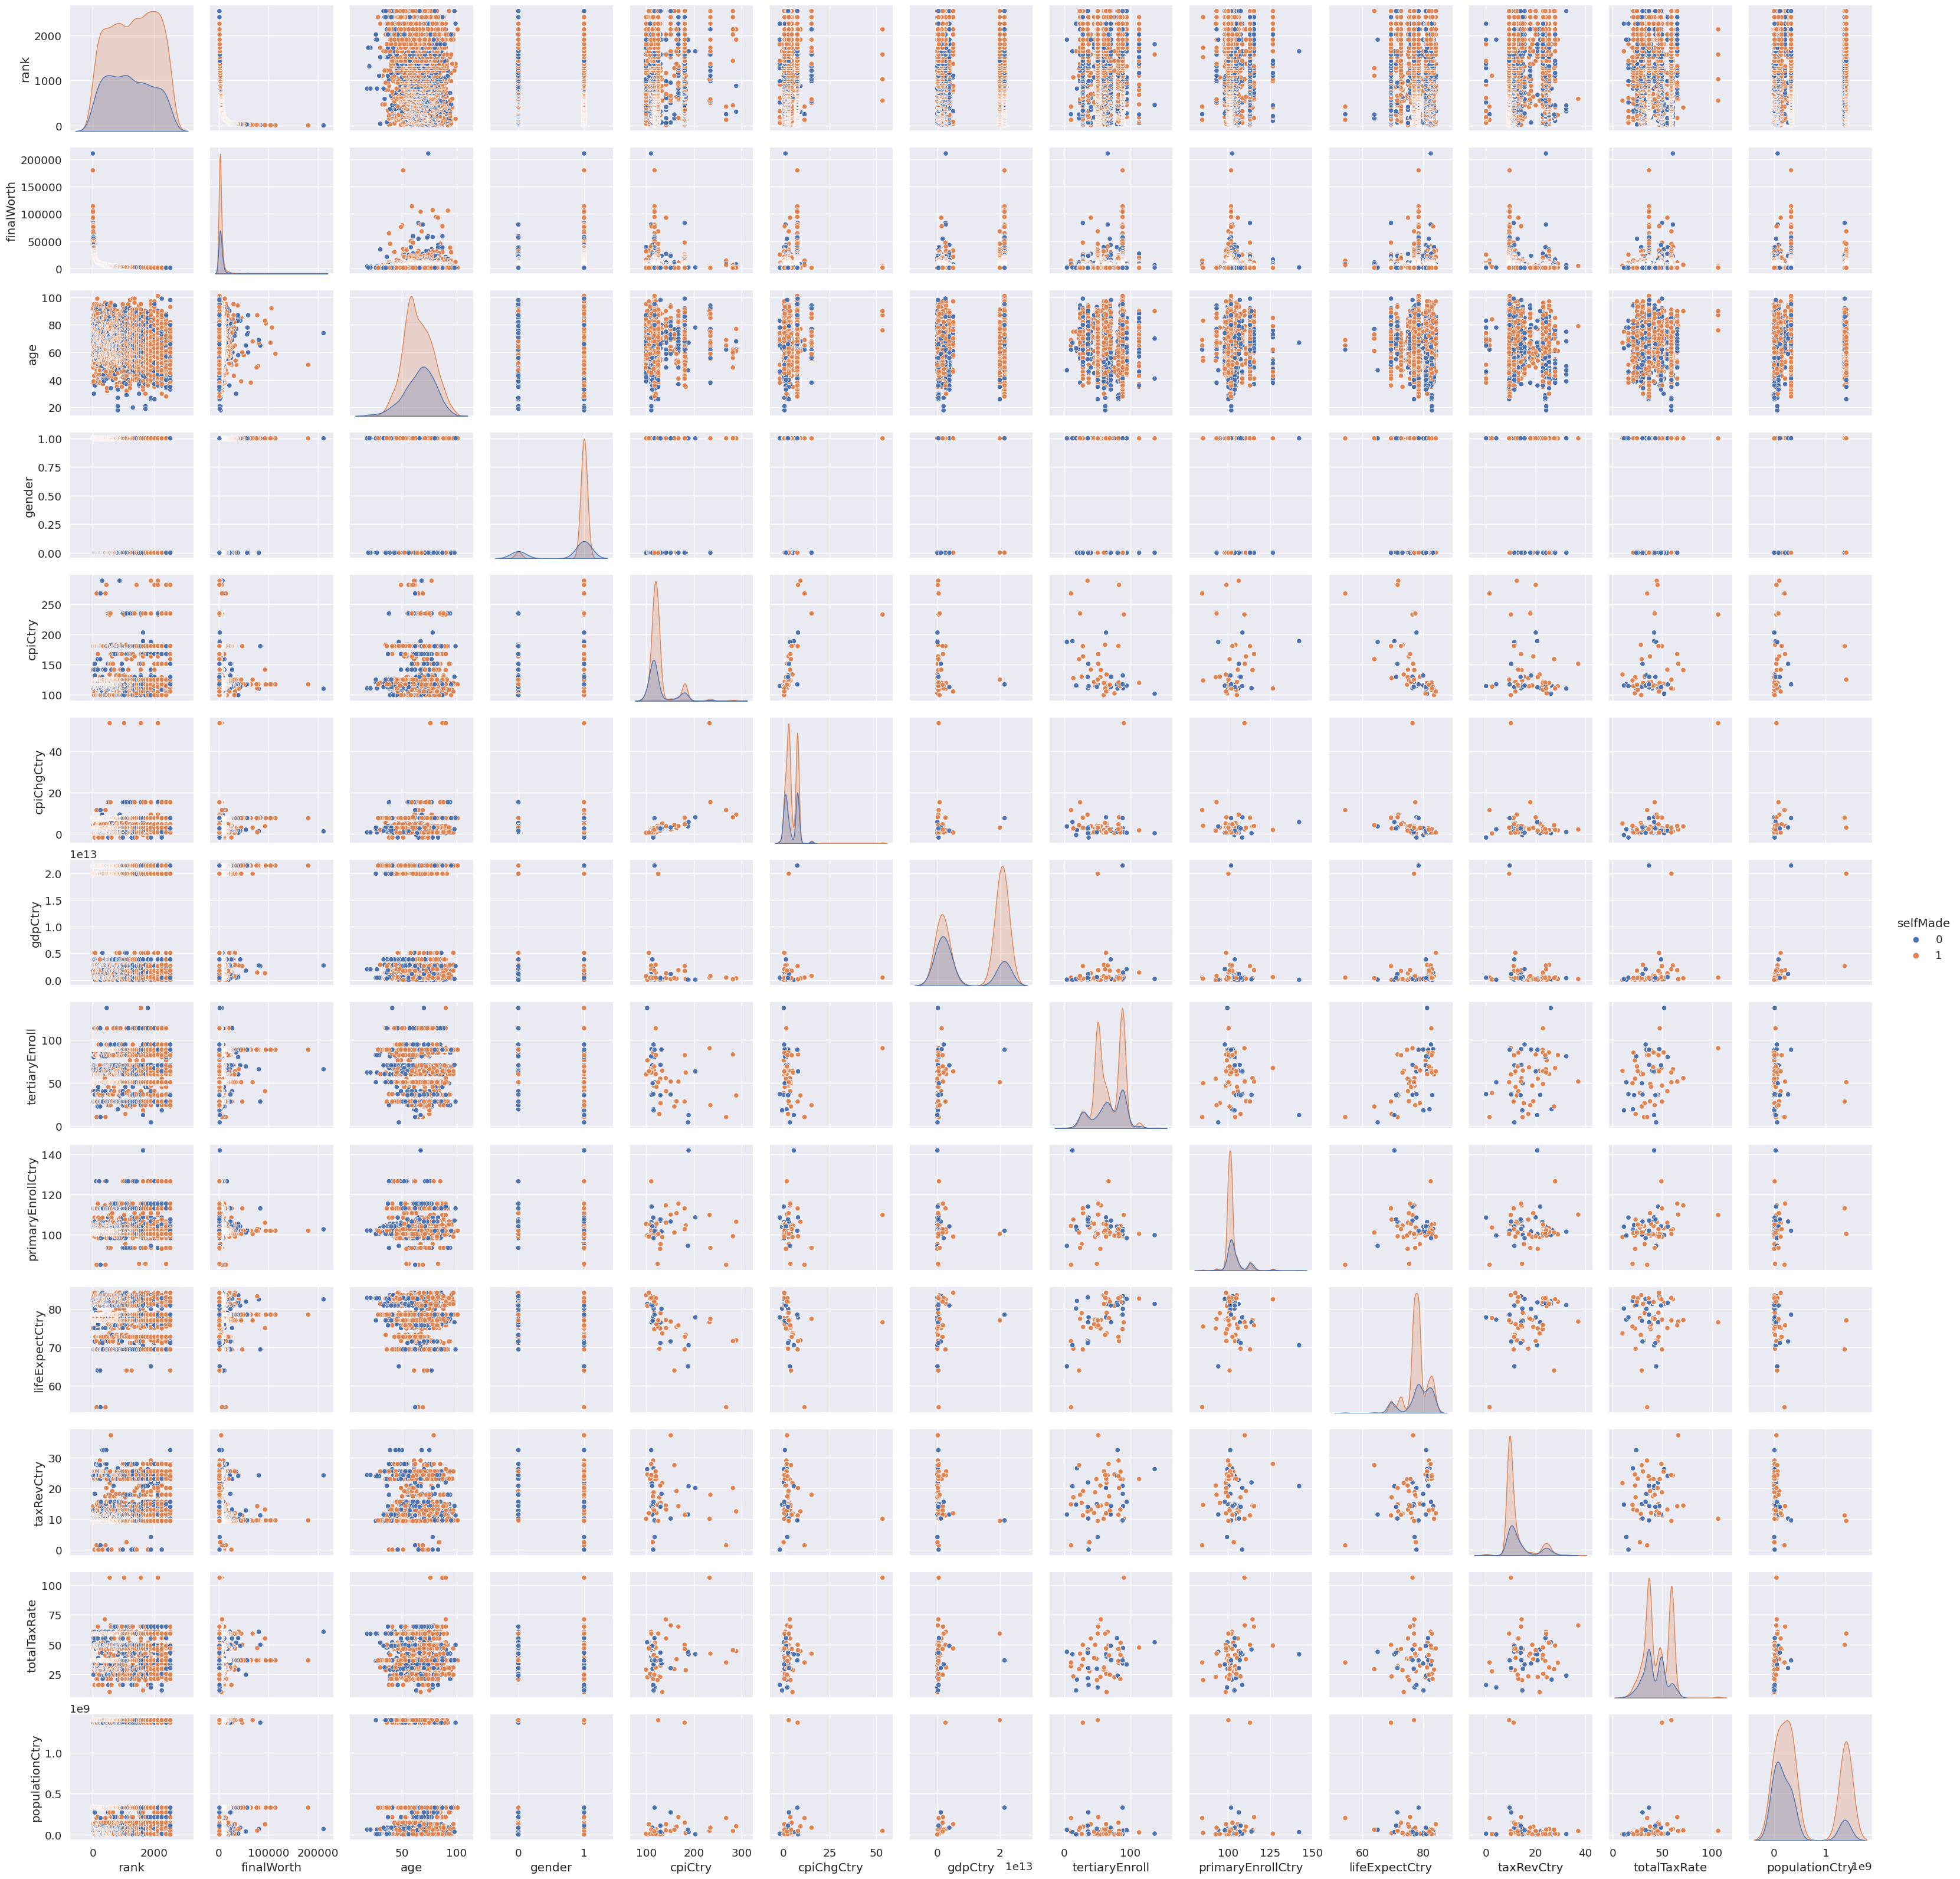

In [ ]:
# Define o tamanho da fonte
sns.set(font_scale=1.2)

# Scatter Plot com Seaborn

sns.pairplot(dataset, hue = "selfMade", height = 2.5);

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

É verificada a presença de valores nulos em cada coluna do conjunto de dados representado pela variável dataset. Utilizando a função isnull(), que gera uma matriz booleana indicando as posições dos valores nulos. Em seguida, a função sum() é aplicada para contar o número de valores nulos em cada coluna, resultando em uma série que mostra a quantidade de valores ausentes em cada atributo do conjunto de dados. Tais valores serão tratados a seguir.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

rank                   0
finalWorth             0
age                   65
industries             0
gender                 0
cpiCtry              184
cpiChgCtry           184
gdpCtry              164
tertiaryEnroll       182
primaryEnrollCtry    181
lifeExpectCtry       182
taxRevCtry           183
totalTaxRate         182
populationCtry       164
selfMade               0
dtype: int64

<Axes: >

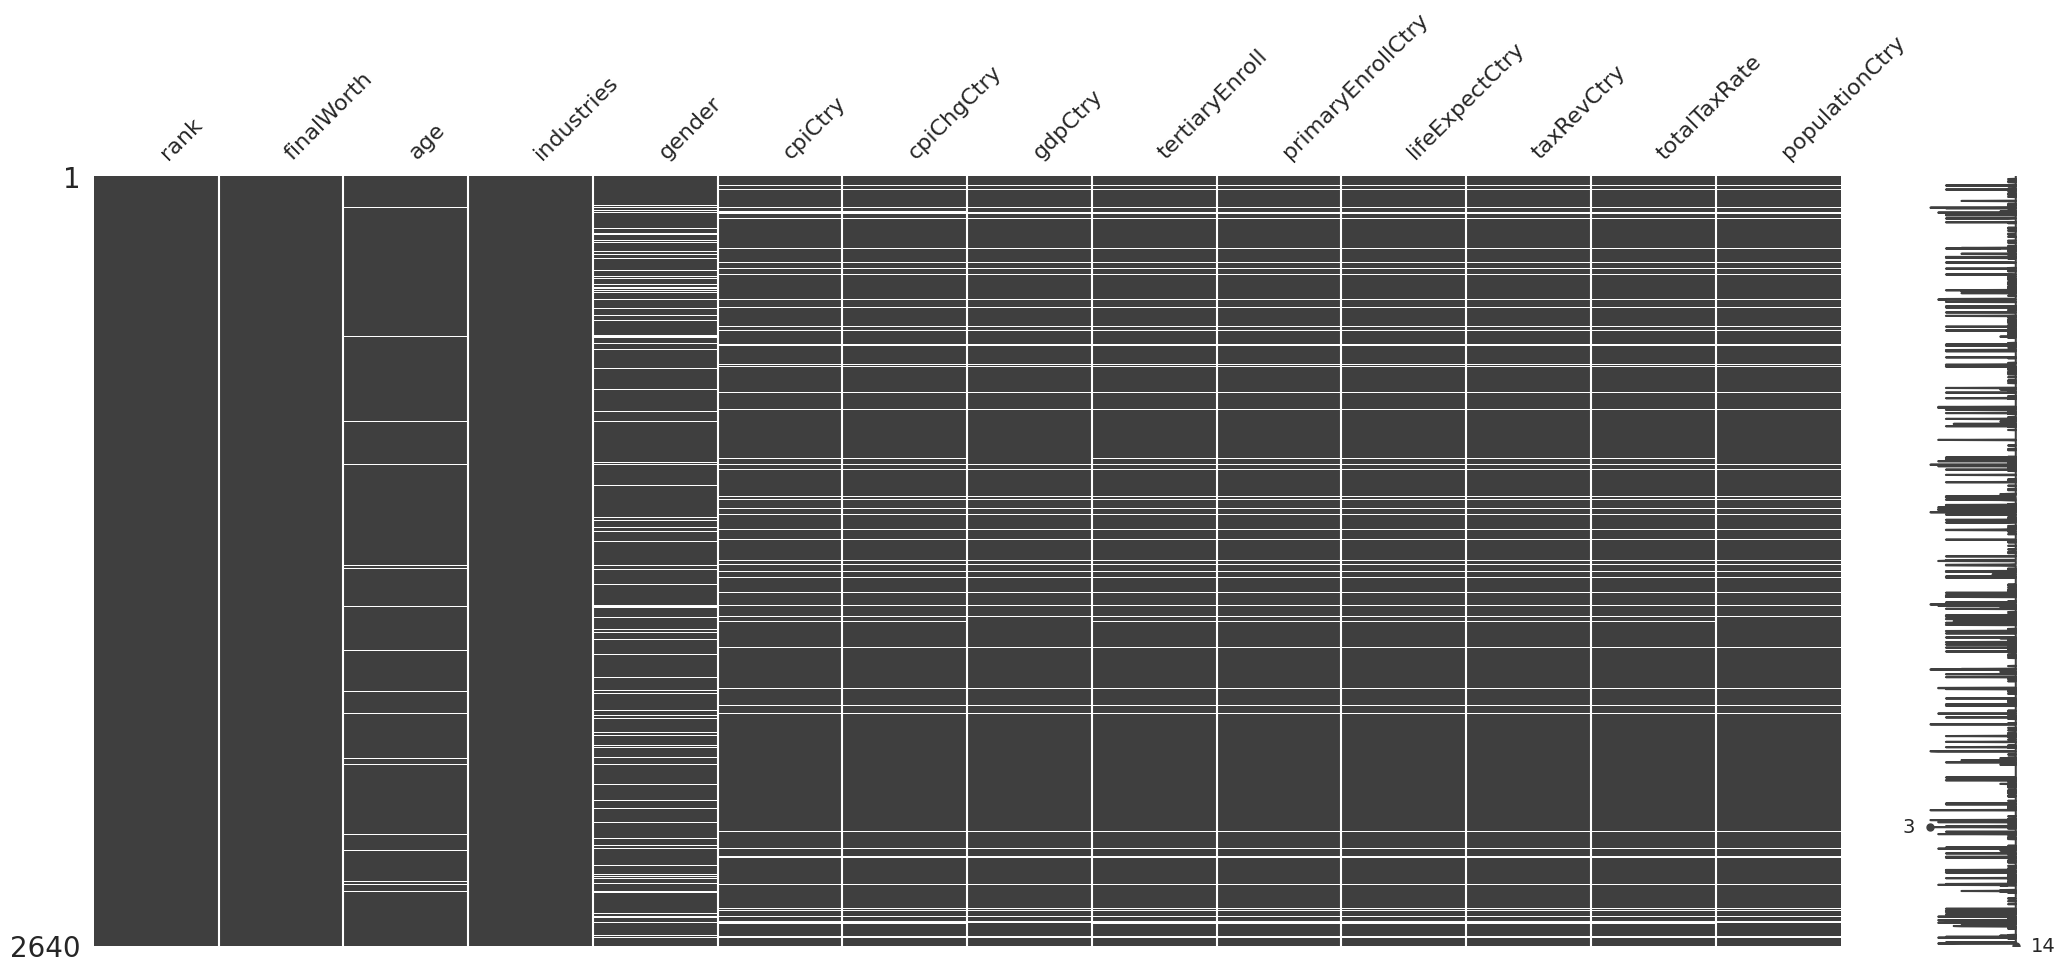

In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (selfMade)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

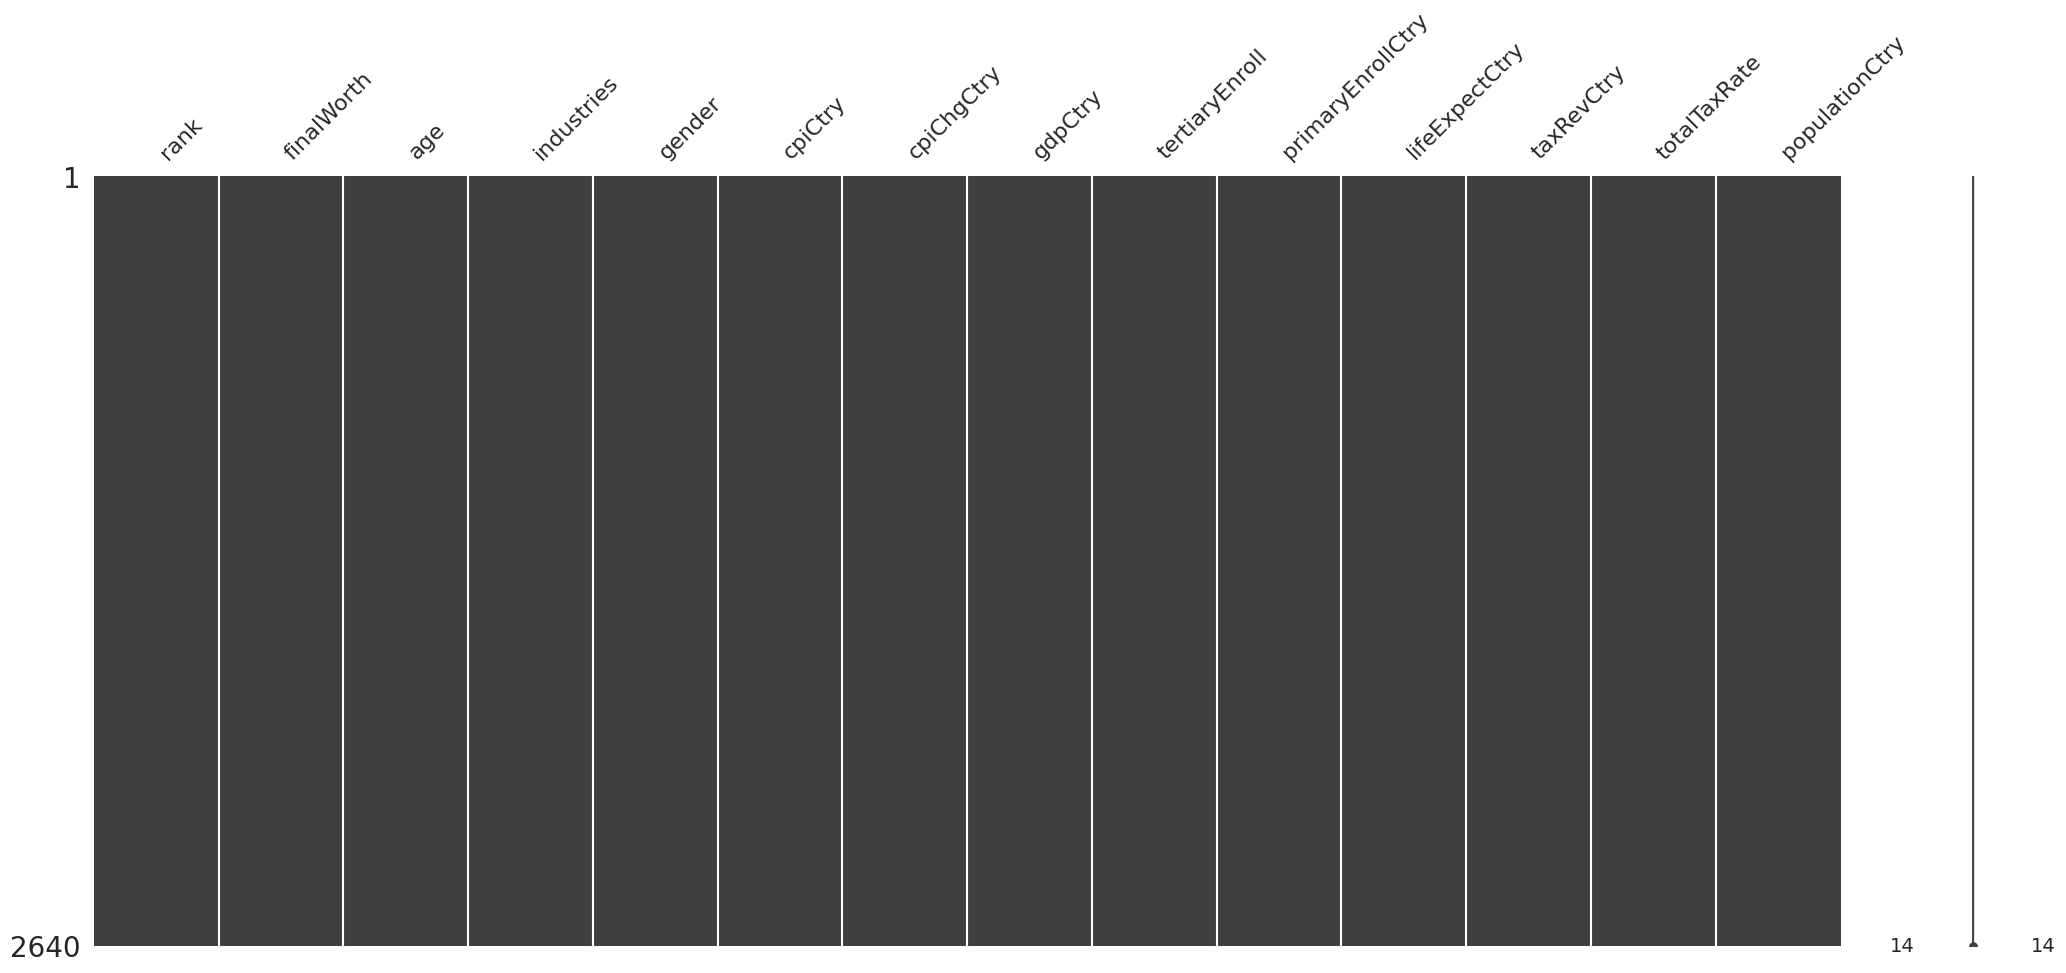

In [ ]:
# substituindo os NaN de 'gender' por 0
atributos['gender'].fillna(0, inplace=True)

# substituindo os NaN de 'age', 'cpiCtry', 'cpiChgCtry', 'tertiaryEnroll', 'primaryEnrollCtry', 'lifeExpectCtry', 'taxRevCtry', 'totalTaxRate', 'populationCtry' pela mediana da coluna
atributos['age'].fillna(atributos['age'].median(), inplace=True)
atributos['cpiCtry'].fillna(atributos['cpiCtry'].median(), inplace=True)
atributos['gdpCtry'].fillna(atributos['gdpCtry'].median(), inplace=True)
atributos['cpiChgCtry'].fillna(atributos['cpiCtry'].median(), inplace=True)
atributos['primaryEnrollCtry'].fillna(atributos['primaryEnrollCtry'].median(), inplace=True)
atributos['tertiaryEnroll'].fillna(atributos['tertiaryEnroll'].median(), inplace=True)
atributos['lifeExpectCtry'].fillna(atributos['lifeExpectCtry'].median(), inplace=True)
atributos['taxRevCtry'].fillna(atributos['taxRevCtry'].median(), inplace=True)
atributos['totalTaxRate'].fillna(atributos['totalTaxRate'].median(), inplace=True)
atributos['populationCtry'].fillna(atributos['populationCtry'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'selfMade' no novo dataset
datasetSemMissings['selfMade'] = dataset['selfMade']

# exibindo as primeiras linhas
datasetSemMissings.head()

rank  finalWorth   age             industries  gender  cpiCtry  cpiChgCtry  \
0     1      211000  74.0       Fashion & Retail     1.0   110.05         1.1   
1     2      180000  51.0             Automotive     1.0   117.24         7.5   
2     3      114000  59.0             Technology     1.0   117.24         7.5   
3     4      107000  78.0             Technology     1.0   117.24         7.5   
4     5      106000  92.0  Finance & Investments     1.0   117.24         7.5   

        gdpCtry  tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  \
0  2.715518e+12            65.6              102.5            82.5   
1  2.142770e+13            88.2              101.8            78.5   
2  2.142770e+13            88.2              101.8            78.5   
3  2.142770e+13            88.2              101.8            78.5   
4  2.142770e+13            88.2              101.8            78.5   

   taxRevCtry  totalTaxRate  populationCtry  selfMade  
0        24.2          60.7      67059887.0         0  
1         9.6          36.6     328239523.0         1  
2         9.6          36.6     328239523.0         1  
3         9.6          36.6     328239523.0         1  
4         9.6          36.6     328239523.0         1

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [ ]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:14]
y = array[:,14]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

## Conclusão

Neste MVP foi possível verificar que... [escreva aqui os seu principais achados, pontos de atenção, etc.]